##Modelling Pipeline
1. Classification
2. Regression

In [1]:
!python --version

Python 3.7.13


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv'

df = pd.read_csv(url)
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [4]:
# set data types

df['ref'] = df['ref'].astype('string')
#df['company_manufacturer'] = pd.to_numeric(df['company_manufacturer'], errors='coerce')
df['company_manufacturer'] = df['company_manufacturer'].astype('string')
df['company_location'] = df['company_location'].astype('string')
#df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
#df['review_date'] = df['review_date'].astype('string')
df['country_of_bean_origin'] = df['country_of_bean_origin'].astype('string')
df['specific_bean_origin_or_bar_name'] = df['specific_bean_origin_or_bar_name'].astype('string')

df['cocoa_percent'] = df['cocoa_percent'].astype('string') # to string
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%','') # remove %
df['cocoa_percent'] = pd.to_numeric(df['cocoa_percent'], errors='coerce')
df['ingredients'] = df['ingredients'].astype('string')
df['most_memorable_characteristics'] = df['most_memorable_characteristics'].astype('string')


In [5]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   string 
 1   company_manufacturer              2530 non-null   string 
 2   company_location                  2530 non-null   string 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   string 
 5   specific_bean_origin_or_bar_name  2530 non-null   string 
 6   cocoa_percent                     2530 non-null   float64
 7   ingredients                       2443 non-null   string 
 8   most_memorable_characteristics    2530 non-null   string 
 9   rating                            2530 non-null   float64
dtypes: float64(2), int64(1), string(7)
memory usage: 197.8 KB


###EDA

####Univariate Analysis

In [7]:
df.describe()

,review_date,cocoa_percent,rating
count,2530.000000,2530.000000,2530.000000
mean,2014.374308,71.639723,3.196344
std,3.968267,5.616724,0.445321
min,2006.000000,42.000000,1.000000
25%,2012.000000,70.000000,3.000000
50%,2015.000000,70.000000,3.250000
75%,2018.000000,74.000000,3.500000
max,2021.000000,100.000000,4.000000


In [8]:
# Check unique values per column using list comprehension - Alt 1 - Dont use this!
cols = [col for col in df]
unique_values = [unique for unique in df.nunique()]
cols_with_unique_values = list(zip(cols, unique_values))
cols_with_unique_values

[('ref', 630),
 ('company_manufacturer', 580),
 ('company_location', 67),
 ('review_date', 16),
 ('country_of_bean_origin', 62),
 ('specific_bean_origin_or_bar_name', 1605),
 ('cocoa_percent', 46),
 ('ingredients', 21),
 ('most_memorable_characteristics', 2487),
 ('rating', 12)]

In [ ]:
# Check unique values per column using built in pandas method - Alt 2 - Use this!
print(df.nunique())

ref                                  630
company_manufacturer                 580
company_location                      67
review_date                           16
country_of_bean_origin                62
specific_bean_origin_or_bar_name    1605
cocoa_percent                         46
ingredients                           21
most_memorable_characteristics      2487
rating                                12
dtype: int64


In [ ]:
df_num = df[['cocoa_percent','rating','review_date']]
df_num.head(1)

,cocoa_percent,rating,review_date
0,76.0,3.25,2019


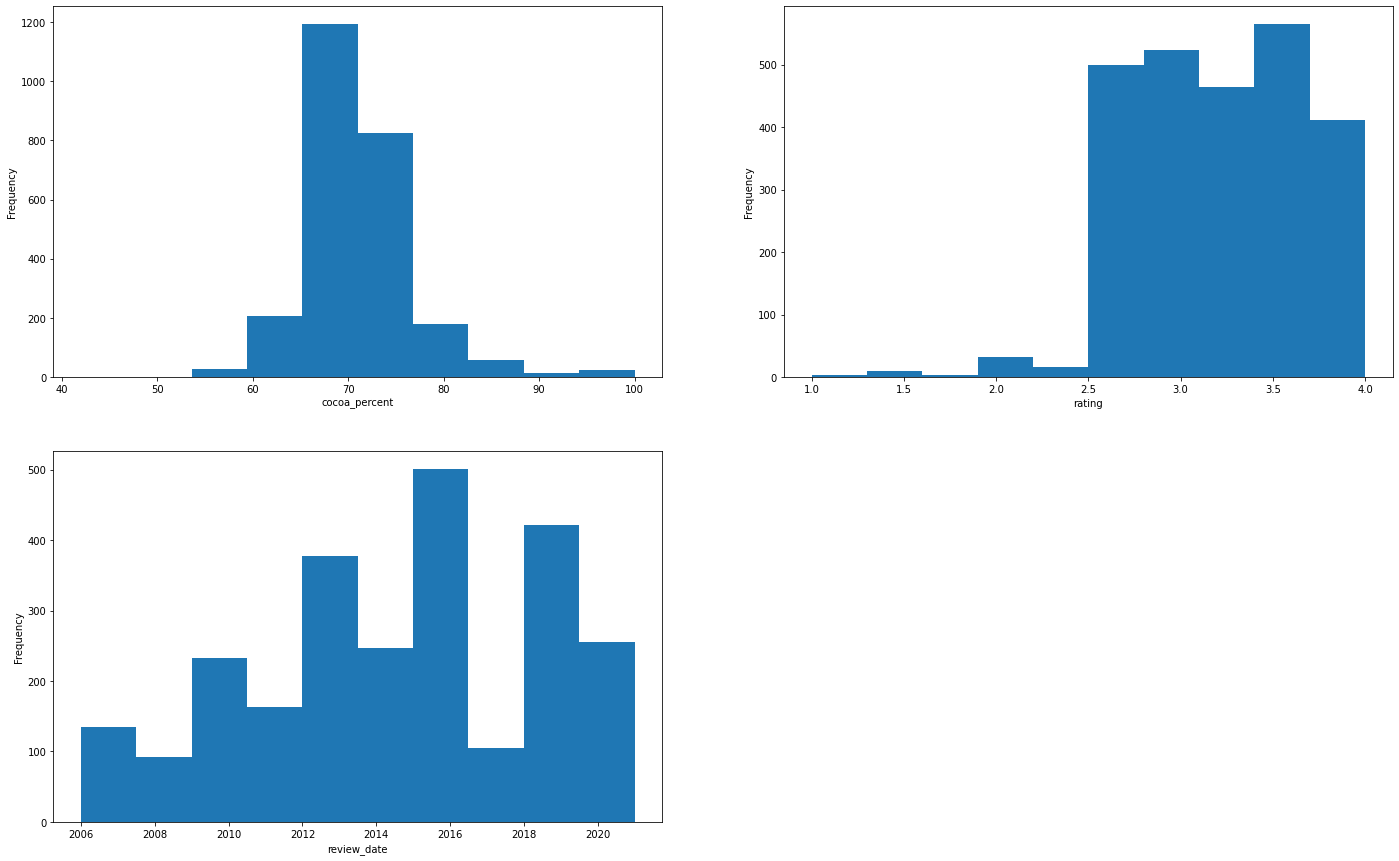

In [ ]:
fig = plt.figure(figsize=(24,15))
i = 0

for column in df_num:
  sub = fig.add_subplot(2,2, i + 1)
  sub.set_xlabel(column)
  df[column].plot(kind = 'hist')
  i += 1

In [ ]:
# create binary label of rating
df['label'] = np.where(df['rating'] > 3.0, True, False)

In [ ]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,label
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,True
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,True
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,True
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,False


In [ ]:
label_counts = df['label'].value_counts()
label_counts

True     1441
False    1089
Name: label, dtype: int64

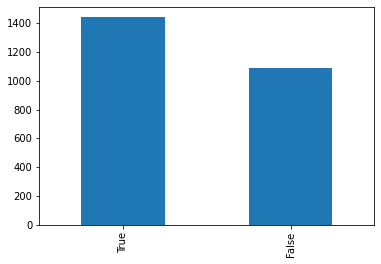

In [ ]:
label_counts.plot(kind='bar')
plt.show()

In [ ]:
import seaborn as sns

####Categorical Features

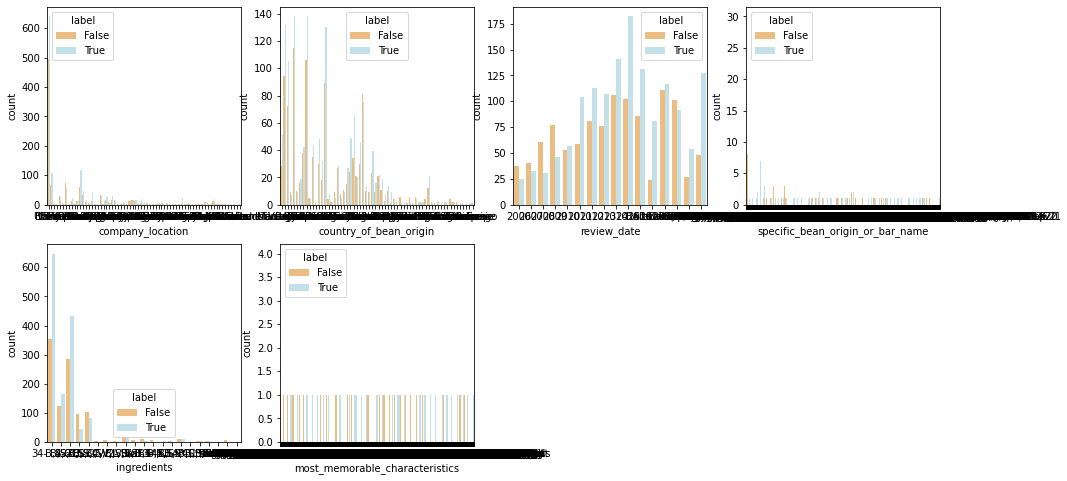

In [ ]:
cat_list = ["company_location","country_of_bean_origin","review_date","specific_bean_origin_or_bar_name","ingredients","most_memorable_characteristics"]
fig = plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 4, i + 1)
  chart = sns.countplot(data = df,
                        x = column,
                        hue = 'label',
                        palette = 'RdYlBu')


From above we see that there are too many values of the categorical features for the plot to be meaningfull

In [ ]:
df_us = df[df['company_location']=='U.S.A.']
print(df_us.shape)
df_us.head()

(1136, 11)


,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,label
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,True
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,True
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,True
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,False


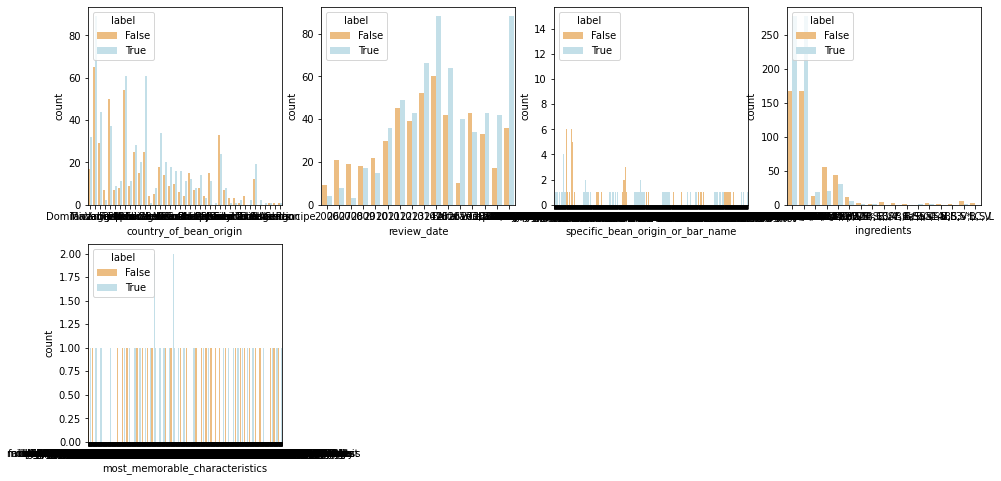

In [ ]:
cat_list = ["country_of_bean_origin","review_date","specific_bean_origin_or_bar_name","ingredients","most_memorable_characteristics"]
fig = plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 4, i + 1)
  chart = sns.countplot(data = df_us,
                        x = column,
                        hue = 'label',
                        palette = 'RdYlBu')

####Numerical Features vs Target in Box Plot

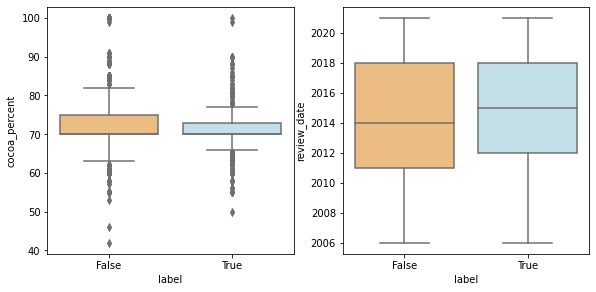

In [ ]:
# box plot TBD
num_list = ['cocoa_percent','review_date']
fig = plt.figure(figsize=(15,10))

for i in range(len(num_list)):
  column = num_list[i]
  sub = fig.add_subplot(2, 3, i + 1)
  sns.boxplot(x = 'label', y = column, data = df, palette = "RdYlBu")

There is slight difference in median review_date vs the label, not much but still test these two numberical variables as features for the first modeling pipeline.

In [ ]:
df_num  = df[['cocoa_percent','review_date']]
df_num.head()

,cocoa_percent,review_date
0,76.0,2019
1,76.0,2019
2,76.0,2019
3,68.0,2021
4,72.0,2021


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df_num[['cocoa_percent','review_date']].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y) # added stratify to improve accuracy

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1695, 2)
(1695,)


###Machine Learning Model Pipeline
  
###1.Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

###Model Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list =['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
  auc_list.append(round(metrics.auc(fpr, tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))

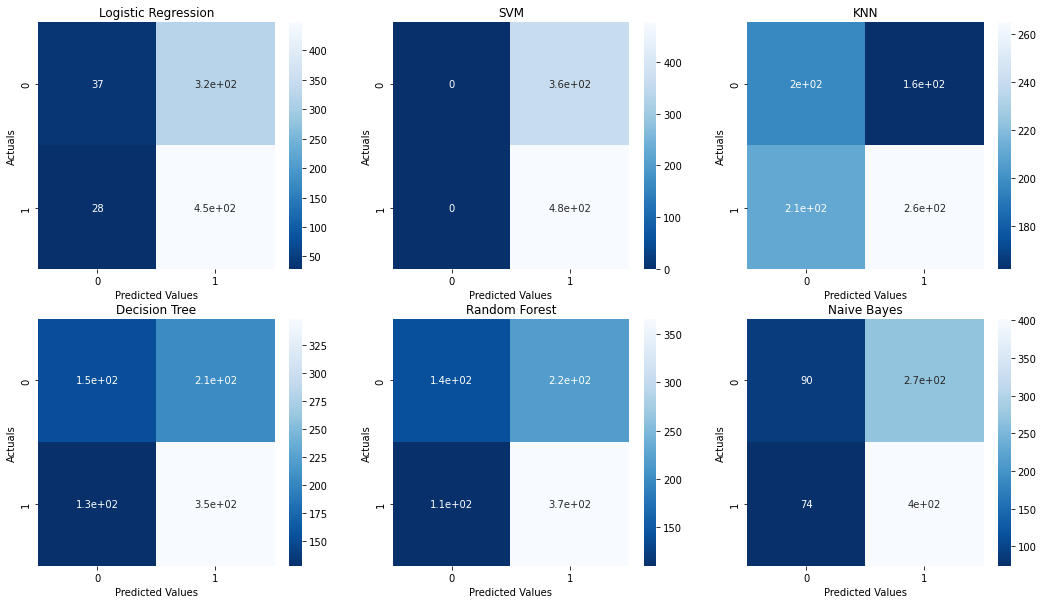

In [ ]:
# plot confusion matrix
fig = plt.figure(figsize = (18, 10))

for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2, 3, i+1).set_title(model)
  cm_plot =sns.heatmap(cm, annot=True, cmap= 'Blues_r')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actuals')


In [ ]:
# accuracy 
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.580838,0.52
1,SVM,0.570060,0.50
2,KNN,0.553293,0.55
3,Decision Tree,0.600000,0.58
4,Random Forest,0.607186,0.58
5,Naive Bayes,0.589222,0.55


As expected the features `cocoa_percent` and `review_date` are poor at predicting the binary label of high rating, regardless of modelling approach.

In [ ]:
# Fit one classifier manually...
knn = KNeighborsClassifier(n_neighbors=6) # Large k, simpler model, risk of underfitting. Small k, complex model, risk of overfitting
knn.fit(X_train, y_train)
print(f"accuracy: {knn.score(X_test, y_test)}")

# ...predict on some new unlabeled data
X_new = np.array([[60, 2015],
                  [70, 2017],
                  [80, 2019]])
print(X_new.shape)

#KNeighborsClassifier.predict(X_new)
predictions = knn.predict(X_new)
print(f"predictions: {predictions}")

accuracy: 0.5497005988023952
(3, 2)
predictions: [False  True  True]


In [ ]:
# Model complexity, over and underfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y) 

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train) 
  test_accuracies[neighbor] = knn.score(X_test, y_test)

In [ ]:
print(neighbors)
print(np.array(list(train_accuracies.values())))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[0.58289086 0.55752212 0.59469027 0.5740413  0.63834808 0.62241888
 0.66253687 0.64070796 0.6619469  0.65663717 0.65722714 0.64955752
 0.65132743 0.64424779 0.65309735 0.64070796 0.64483776 0.64483776
 0.63893805 0.64837758 0.64483776 0.63657817 0.64365782 0.64011799
 0.64011799]


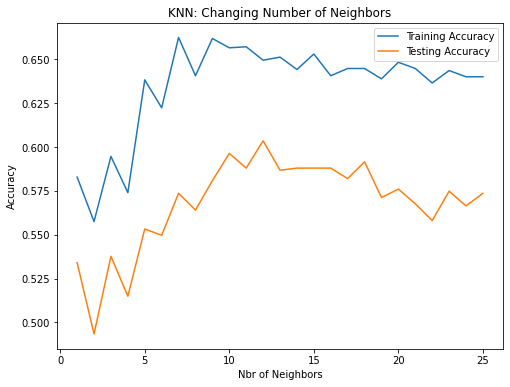

In [ ]:
# plot accuracies
plt.figure(figsize=(8, 6))
plt.title("KNN: Changing Number of Neighbors")
plt.plot(neighbors, np.array(list(train_accuracies.values())), label='Training Accuracy') # Wrap dict_valus into np array to plot!
plt.plot(neighbors, np.array(list(test_accuracies.values())), label='Testing Accuracy')
plt.legend()
plt.xlabel("Nbr of Neighbors")
plt.ylabel("Accuracy")
plt.show()

We can see how the training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test data set, accuracy peaks at 12 neighbors, this suggests it is the optimal value for our model. Now let´s retrain our model on this parameter setting.

In [ ]:
# Fit the same one classifier manually with the updated n_neighbors parameter from above ...
knn = KNeighborsClassifier(n_neighbors=12) # Large k, simpler model, risk of underfitting. Small k, complex model, risk of overfitting
knn.fit(X_train, y_train)
print(f"accuracy: {knn.score(X_test, y_test)}")

# ...predict on some new unlabeled data
X_new = np.array([[60, 2015],
                  [70, 2017],
                  [80, 2019]])
print(X_new.shape)

#KNeighborsClassifier.predict(X_new)
predictions = knn.predict(X_new)
print(f"predictions: {predictions}")

accuracy: 0.6035928143712574
(3, 2)
predictions: [False  True  True]


We see that test accuracy inreased from `accuracy: 0.5497005988023952` to `accuracy: 0.6035928143712574`. This is better but overall the model is not very good at predicting the label from these two numerical features.  
  
Next, use categorical features. TBD

###2.Regression
2.1 Regression  
2.2 Cross Validation
2.3 Ridge  
2.4 Lasso  
  
####2.1 Multiple Regression

In [9]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [17]:
X = df[['review_date','cocoa_percent']]
y = df['rating']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2530, 2) (2530,)
(1695, 2) (835, 2) (1695,) (835,)


In [25]:
# Multiple Linearregression
reg = LinearRegression()

# fit model
reg.fit(X_train, y_train)

# predict
predictions = reg.predict(X_test)

# Check pred
print(type(predictions), type(y_test))
print(f'Predictions: {predictions[0:4]} vs Actuals: {np.array(y_test[0:4])}\n')

# Check performance
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Print the metrics
print(f'r2: {r_squared}')
print(f'rmse: {rmse}')

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
Predictions: [3.04901079 3.20200998 3.30296473 3.13812102] vs Actuals: [3.75 3.5  3.25 2.5 ]

r2: 0.029277477357999793
rmse: 0.4363143889180181


The features `cocoa_percent` and `review_date` are poor predictors of `rating`.  

####2.3 Cross Validation 

In [27]:
# Create KFold object with n folds
kf = KFold(n_splits=6, shuffle=True, random_state=42)

reg = LinearRegression()

# compute k-fold cv scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)

# print scores (r2 by default)
print(cv_scores)

[ 0.0536163   0.02602736  0.04024077  0.05679416 -0.02074216 -0.01315718]


In [29]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

[ 0.07014324  0.03931785  0.02446999  0.03253933 -0.00520606  0.00914849]
0.0284021385282886
0.02378467483685858
[-0.00341174  0.06629007]


The performance varies over the folds but the model is still really poor.  
  
####2.3 Ridge Regression 

In [30]:
# set a list of alphas (the regularization parameter)
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:

  # create ridge regression model
  ridge = Ridge(alpha=alpha)

  # fit the data
  ridge.fit(X_train, y_train)

  # collect the r-squared values
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.029277484889580818, 0.02927755265234655, 0.029278228156336072, 0.02928477208755831, 0.029330298204268246, 0.028584642611788835]


There is not much difference in the performance with different values of alphas.  
  
###2.4 Lasso Regression  
  
Lasso regression for feature importance. Lasso regression can be used to identify important features in a dataset. Lets fit a lasso regression model to the same data and plot the model's coefficients.

[ 0.         -0.00211706]


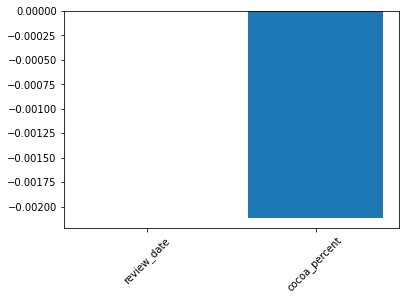

In [32]:
# instantiate a lasso regression with an alpha value
lasso = Lasso(alpha=0.3)

# fit the data to the model
lasso.fit(X_train, y_train)

cols = ['review_date','cocoa_percent']

# calculate and  print coeffs
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(cols, lasso_coef)
plt.xticks(rotation=45)
plt.show()

The feature `cocoa_percent` seems to be the most important feature of the two to predict `ratings` all though the model overall is quite poor.